In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#KNN required libraries
from sklearn.neighbors import KNeighborsClassifier  
import joblib


df=pd.read_parquet('train-00000-of-00001.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [4]:
df.label.nunique()

4

In [5]:
df.nunique()

text     120000
label         4
dtype: int64

In [6]:
df.isnull().sum()

text     0
label    0
dtype: int64

###### There are no null values, then we can skip the stage of processing Null values handeling

In [7]:
df.sample(5)

,text,label
40385,Iran #39;s Asefi: No plan to quit NPT Iran str...,0
44031,Hope in journalists #39; release THE French go...,0
68751,Swatch #39;s Paparazzi Watch Receives Wireless...,3
79137,Update 1: Lockheed to Cut 4Q Earnings on Suit ...,2
30264,Magpies go double Dutch PATRICK KLUIVERT struc...,1


In [8]:
df.describe()

,label
count,120000.000000
mean,1.500000
std,1.118039
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


we go now for the data cleaning

In [9]:
nltk.download('stopwords', quiet=True)

True

let's clean the text!

In [10]:
def clean_text(text): # this function is used to make some needed string formats
    text = text.lower()  # Lowercasing
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()  # Tokenization
    stop_words = set(stopwords.words('english'))  # Use set for faster lookup    
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words) # join the list of words to be string again
df['cleaned_text'] = df['text'].apply(clean_text)

we now convert the cleaned text into TF-IDF features

In [11]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned_text'])

we now go for training the models.
let's start by the Logistic regression

In [12]:
model = LogisticRegression(max_iter=100000)
model.fit(X, df['label'])

LogisticRegression(max_iter=100000)

In [25]:
y_pred = model.predict(X)
print(classification_report( y_pred, df['label']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     28979
           1       0.99      0.97      0.98     30730
           2       0.92      0.93      0.92     29863
           3       0.94      0.92      0.93     30428

    accuracy                           0.94    120000
   macro avg       0.94      0.94      0.94    120000
weighted avg       0.95      0.94      0.94    120000



we need now to load the test data and clean it

In [ ]:
test_df = pd.read_parquet('test-00000-of-00001.parquet') #loading the test data
test_df['cleaned_text'] = test_df['text'].apply(clean_text) #cleaning the test data
#make sure that the code works properly

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          7600 non-null   object
 1   label         7600 non-null   int64 
 2   cleaned_text  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


let's work with the feature engineering

In [18]:
X_test = tfidf.transform(test_df['cleaned_text'])
y_test = test_df['label']

applying the test data to the trained model and evaluating the model's performance

Here we go for visualization

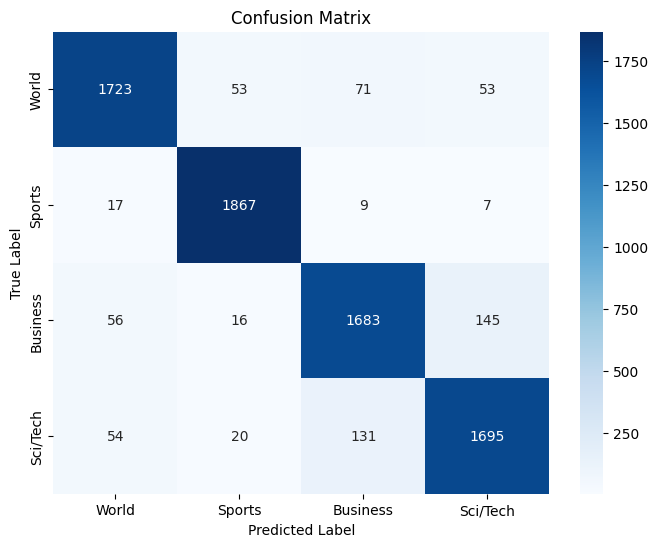

In [21]:
cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],  # Label the axes
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### we go to the KNN model

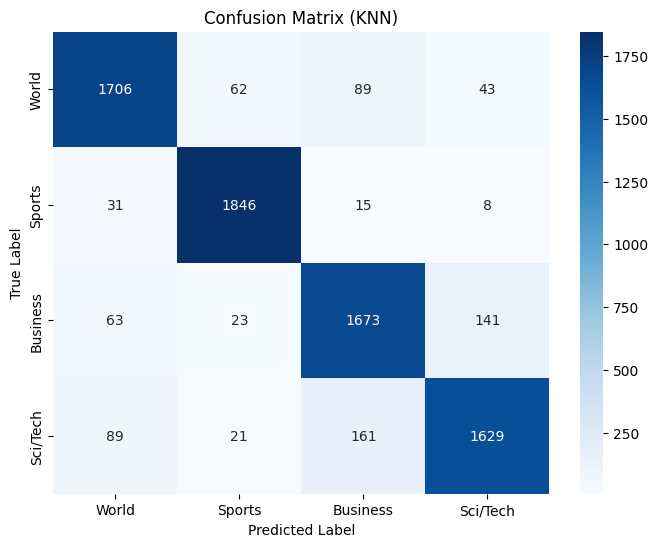

In [23]:


#model training (KNN)
knn_model = KNeighborsClassifier()  # You can specify n_neighbors (k) here
knn_model.fit(X,df['label'])

y_pred_knn = knn_model.predict(X_test)
classification_report(y_test, y_pred_knn, target_names=['World', 'Sports', 'Business', 'Sci/Tech'])

#Visualizing
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (KNN)")
plt.show()

In [24]:
#comparing the accuracy
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['World', 'Sports', 'Business', 'Sci/Tech'])) # Labeling


              precision    recall  f1-score   support

       World       0.93      0.91      0.92      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.89      0.89      0.89      1900
    Sci/Tech       0.89      0.89      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



# Report
Our task was talking about using supervised Machine learning to classify the category of news and here is what we did and conclude:
## Imprting Libraries and Loading data
We first imported the training dataset as a .parqurt file and imported the libraries needed, including:
1. pandas: to work with dataframes
2. matplotlib: to visualize our results
3. nltk (natural language tool kit): to work with the natural language texts given in a piece of news + to delete the stopwords and understand the given meaning of a word,...
4. sklearn: we used:
    1.  TF-IDF vectorization to reduce the number of features and fasten the processes (performanece)
    2.  Logestic regrission and KNN classification as models to compare between
    3.  confusion matrix and classification report to illustrate the results (as strings)
## Exploratory Data Analysis (EDA)
we illustrated a piece of the data to understand the structure of it. Fortunetly, no null values existed. There were 4 categories (4 classifications): Sport, Worls, Sci/Tech and business.
## Cleaning text
we used nltk library to delete the stopwords from teh data, like: "the", "a", ...
## logistic regression and KNN
we used TF-IDF to reduce the dimensionality of the processed dataset, and as it was big, we decided to pass the parameter (max_iter= 10000) to handle te big number of records in the dataset. For KNN, we did the same approx.. we first give the categories of our data and then created our KNN model
## Results
After working with 2 models for supervised learning, evaluating the two models and passing the test data, we can see that the accuracy of KNN was 0.92, while the logistic regression has an accuracy of 0.94. we can say that logistic regression was more accurate than KNN. That can be explained because KNN is more specialized in one-hot encoding.